# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

## Exercício: Análise Exploratória de Dados com Python

Neste exercício, você vai realizar uma análise exploratória em um dos mais famosos datasets para Machine Learning, o dataset iris com informações sobre 3 tipos de plantas. Esse dataset é comumente usado em problemas de Machine Learning de classificação, quando nosso objetivo é prever a classe dos dados. No caso deste dataset, prever a categoria de uma planta a partir de medidas da planta (sepal e petal).

Em cada célula, você encontra a tarefa a ser realizada. Faça todo o exercício e depois compare com a solução proposta.

Dataset (já disponível com o Scikit-Learn): https://archive.ics.uci.edu/ml/datasets/iris

In [1]:
# Imports
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

fontsize = 14
ticklabelsize = 14

In [15]:
# Carregando o dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(len(df))
df.head()

150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Extração e Transformação de Dados

In [29]:
# Imprima os valores numéricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: setosa, versicolor ou virginica
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [28]:
# Imprima os valores numéricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: 0, 1 ou 2
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [42]:
# Adicione ao dataset uma nova coluna com os nomes das espécies, pois é isso que vamos tentar prever (variável target)
df['especie'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [49]:
# Inclua no dataset uma coluna com os valores numéricos da variável target
df['codigo-especie'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie,codigo-especie
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [169]:
# Extraia as features (atributos) do dataset e imprima 
df.columns[:-2]

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [59]:
# Calcule a média de cada feature para as 3 classes
df.mean()
df.groupby('especie').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),codigo-especie
especie,,,,,
setosa,5.006,3.418,1.464,0.244,0
versicolor,5.936,2.770,4.260,1.326,1
virginica,6.588,2.974,5.552,2.026,2


## Exploração de Dados

In [61]:
# Imprima uma Transposta do dataset (transforme linhas e colunas e colunas em linhas)
df.head().T

,0,1,2,3,4
sepal length (cm),5.1,4.9,4.7,4.6,5
sepal width (cm),3.5,3,3.2,3.1,3.6
petal length (cm),1.4,1.4,1.3,1.5,1.4
petal width (cm),0.2,0.2,0.2,0.2,0.2
especie,setosa,setosa,setosa,setosa,setosa
codigo-especie,0,0,0,0,0


In [62]:
# Utilize a função Info do dataset para obter um resumo sobre o dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
especie              150 non-null category
codigo-especie       150 non-null int32
dtypes: category(1), float64(4), int32(1)
memory usage: 5.6 KB


In [63]:
# Faça um resumo estatístico do dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),codigo-especie
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [82]:
# Verifique se existem valores nulos no dataset
print(df.isnull().values.any())
print(df.isnull().sum())

False
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
especie              0
codigo-especie       0
dtype: int64


In [84]:
# Faça uma contagem de valores de sepal length
df['sepal length (cm)'].value_counts()

5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: sepal length (cm), dtype: int64

## Plot

Text(0.5,1,'Histograma')

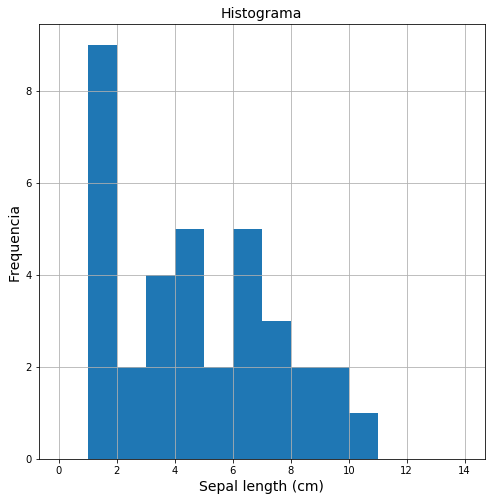

In [141]:
# Crie um Histograma de sepal length
df['sepal length (cm)'].value_counts().hist(bins=range(15), figsize=(8, 8))
plt.xlabel('Sepal length (cm)', fontsize=fontsize)
plt.ylabel('Frequencia', fontsize=fontsize)
plt.title('Histograma', fontsize=fontsize)

Text(0.5,1,'Gráfico de Dispersão dos Atributos, colorido por marcadores da classe alvo')

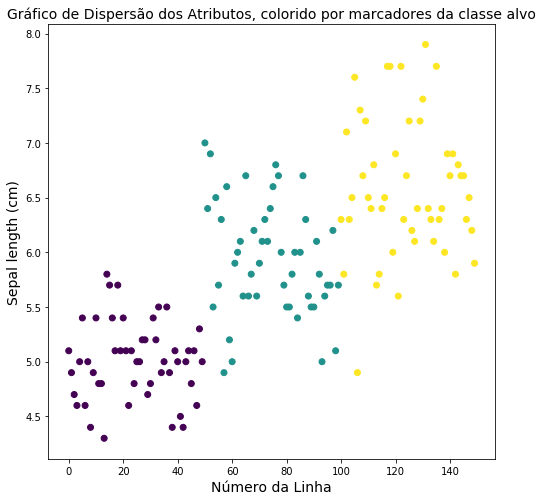

In [143]:
# Crie um Gráficos de Dispersão (scatter Plot) da variável sepal length versus número da linha, 
# colorido por marcadores da variável target
plt.figure(figsize=(8, 8))
plt.scatter(range(len(df)), df['sepal length (cm)'], c=df['codigo-especie'])
plt.xlabel('Número da Linha', fontsize=fontsize)
plt.ylabel('Sepal length (cm)', fontsize=fontsize)
plt.title('Gráfico de Dispersão dos Atributos, colorido por marcadores da classe alvo', fontsize=fontsize)

Text(0,0.5,'petal width (cm)')

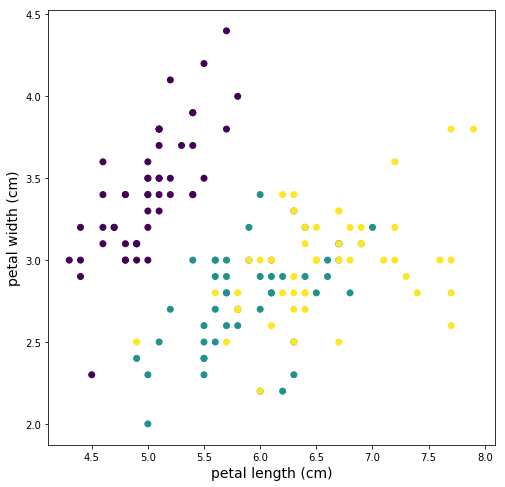

In [154]:
# Crie um Scatter Plot de 2 Features (atributos)
plt.figure(figsize=(8, 8))
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['codigo-especie'])
plt.xlabel('petal length (cm)', fontsize=fontsize)
plt.ylabel('petal width (cm)', fontsize=fontsize)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000195AB8F9F98>,
      dtype=object)

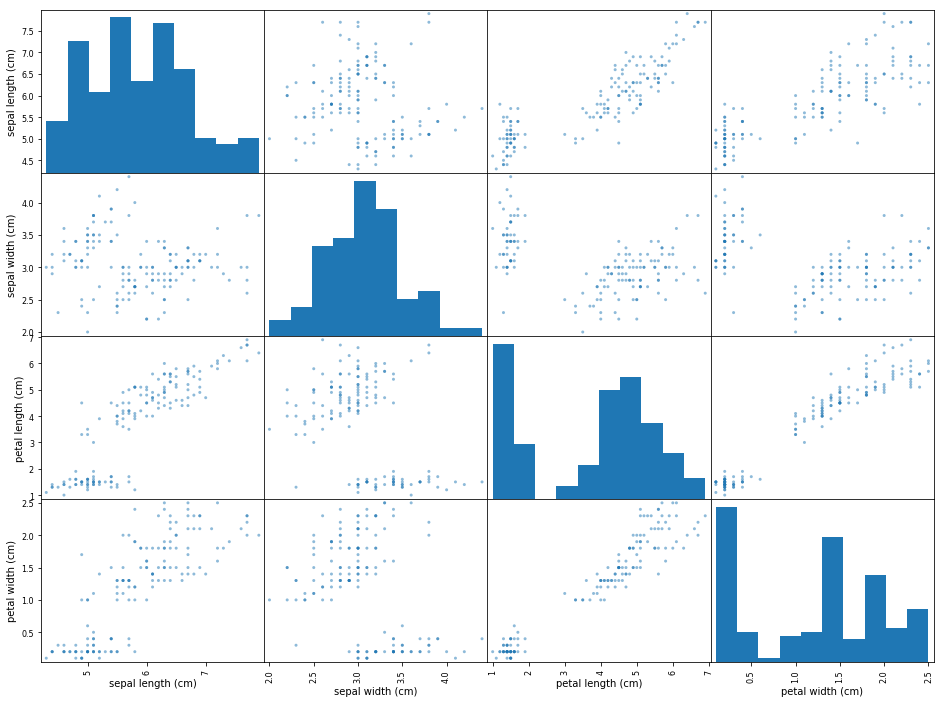

In [165]:
# Crie um Scatter Matrix das Features (atributos)
pd.plotting.scatter_matrix(df[df.columns[:-2]], figsize=(16, 12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000195AC43DE10>,
      dtype=object)

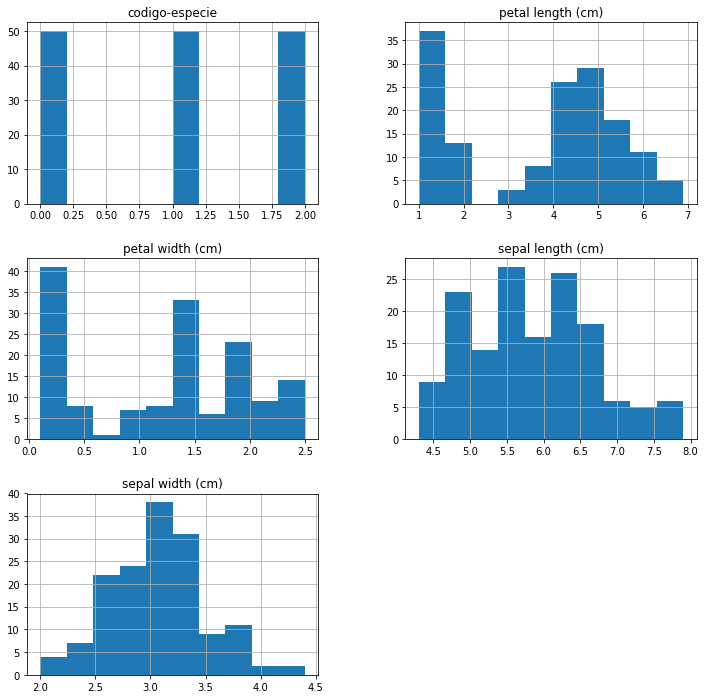

In [168]:
# Crie um Histograma de todas as features
df.hist(figsize=(12,12))

Conheça a Formação Cientista de Dados, um programa completo, 100% online e 100% em português, com 340 horas, mais de 1.200 aulas em vídeos e 26 projetos, que vão ajudá-lo a se tornar um dos profissionais mais cobiçados do mercado de análise de dados. Clique no link abaixo, faça sua inscrição, comece hoje mesmo e aumente sua empregabilidade:

https://www.datascienceacademy.com.br/pages/formacao-cientista-de-dados

# Fim

### Obrigado - Data Science Academy - <a href=http://facebook.com/dsacademy>facebook.com/dsacademybr</a>